# MOST IMPORTANT CORNERS IN SEASON 2025

In [4]:
import sys
!{sys.executable} -m pip install pandas numpy catboost matplotlib



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\laura\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from DataPreprocessing import preprocess_base

In [2]:
model = CatBoostClassifier()
model.load_model("catboost_corners_model_clasification.cbm")

with open("model_meta.json") as f:
    meta = json.load(f)
expected_cols = meta["expected_cols"]
categorical_features = meta["categorical_features"]

# Preprocesamiento de inferencia
df_inf = preprocess_base("liga_mx_2023_2025.csv", inference=True)

print(df_inf.columns)

event_ids = None
if "event_id" in df_inf.columns:
    event_ids = df_inf["event_id"].copy()
    print(f"✅ {len(event_ids)} event_id encontrados.")

# Chequeo de columnas: agrega faltantes con un default neutro
missing = [c for c in expected_cols if c not in df_inf.columns]
if missing:
    for c in missing:
        df_inf[c] = 0  # o un valor por defecto sensato según tu dominio

# Quita extras y reordena exactamente
df_inf = df_inf.reindex(columns=expected_cols)

# Tipos categóricos (string)
for c in categorical_features:
    df_inf[c] = df_inf[c].astype(str)

pool = Pool(df_inf, cat_features=categorical_features)

y_pred = model.predict(pool)
y_proba = model.predict_proba(pool)[:, 1]

df_result = df_inf.copy()
if event_ids is not None:
    df_result.insert(0, "event_id", event_ids)  # inserta al inicio
df_result["predicted_class"] = y_pred
df_result["prob_class_1"] = y_proba

# df_inf.to_csv("inference_results.csv", index=False)
print(df_result[["predicted_class","prob_class_1"]].head())
df_result.to_csv("inference_results.csv", index=False)

import os
print("Archivo guardado en:", os.path.abspath("inference_results.csv"))

Index(['Unnamed: 0', 'pass_height', 'pass_length', 'pass_technique',
       'body_part', 'location_x', 'location_y', 'end_location_x',
       'end_location_y', 'P0_n_defenders_in_18yd_box',
       'P0_n_attackers_in_6yd_box', 'P0_n_attackers_out_6yd_box', 'P0_GK_x',
       'P0_GK_y', 'corner_side', 'P0_n_att_zone_1', 'P0_n_def_zone_1',
       'P0_n_att_zone_3', 'P0_n_def_zone_3', 'P0_n_att_zone_4',
       'P0_n_def_zone_4', 'P0_n_att_zone_5', 'P0_n_def_zone_5',
       'P0_n_att_zone_6', 'P0_n_def_zone_6', 'P0_n_att_zone_7',
       'P0_n_def_zone_7', 'P0_n_att_zone_8', 'P0_n_def_zone_8',
       'P0_n_att_zone_9', 'P0_n_def_zone_9', 'P0_n_att_zone_10',
       'P0_n_def_zone_10', 'P0_n_att_zone_11', 'P0_n_def_zone_11',
       'P0_n_att_zone_12', 'P0_n_def_zone_12', 'P0_n_att_zone_13',
       'P0_n_def_zone_13', 'P0_n_att_zone_14', 'P0_n_def_zone_14',
       'game_state', 'corner_execution_time_label', 'xg_20s', 'xg_20s_def',
       'goal_20s', 'goal_20s_def', 'P1_n_defenders_in_18yd_box',

In [3]:
df = pd.read_csv('liga_mx_2023_2025.csv')

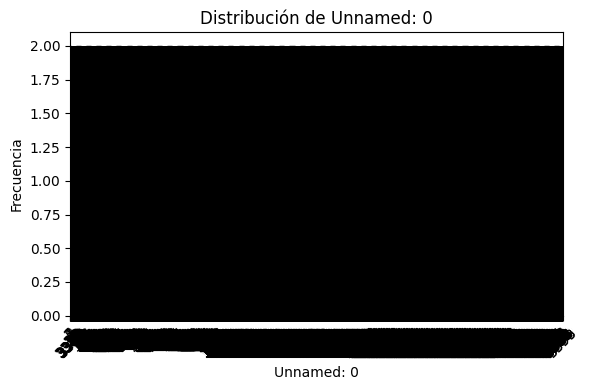

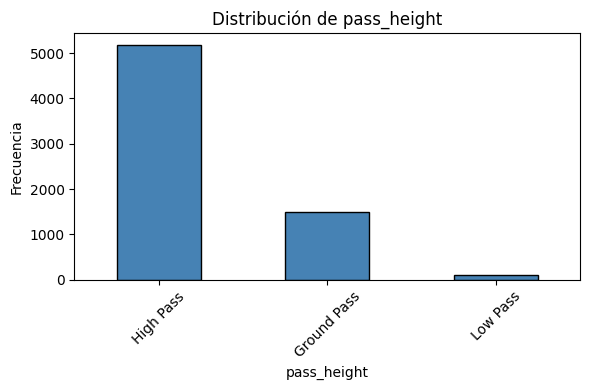

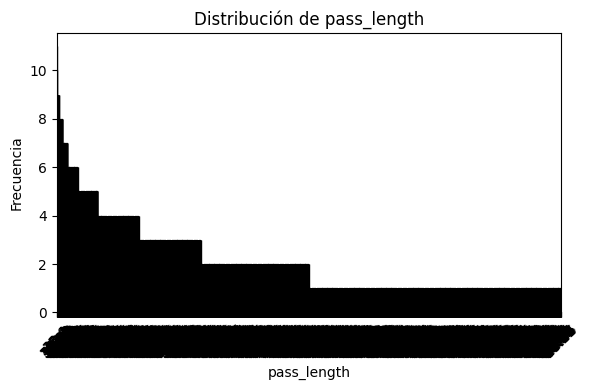

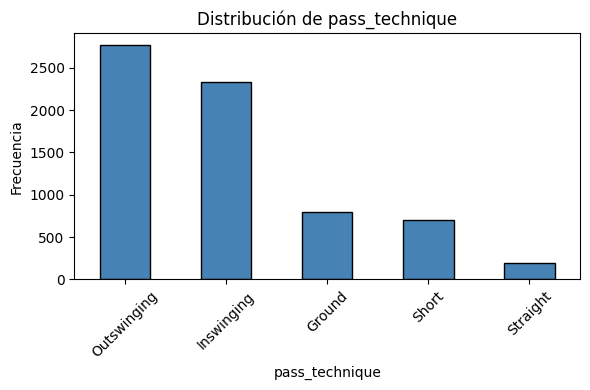

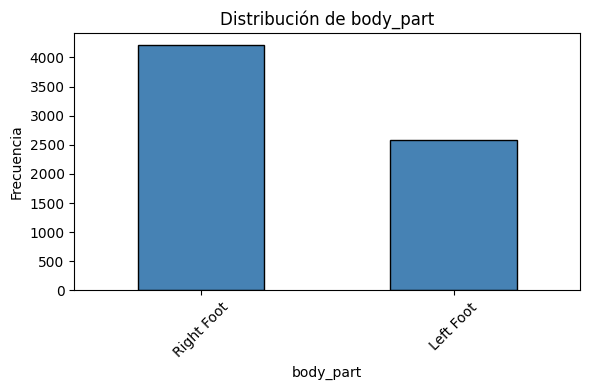

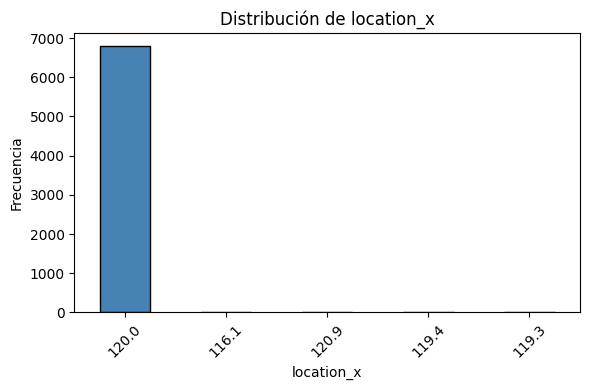

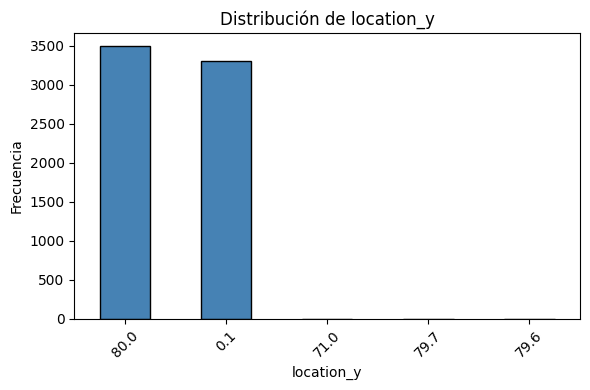

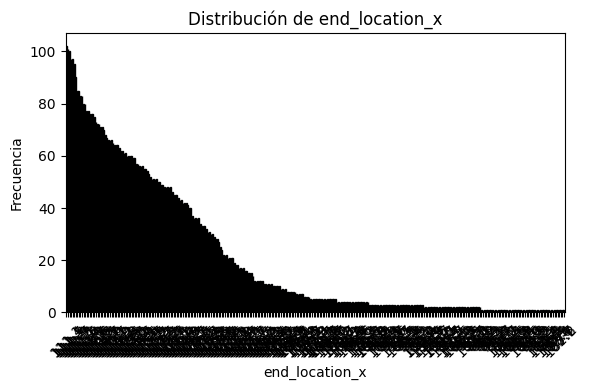

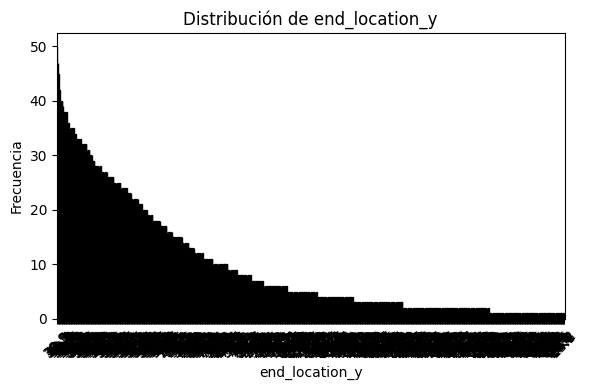

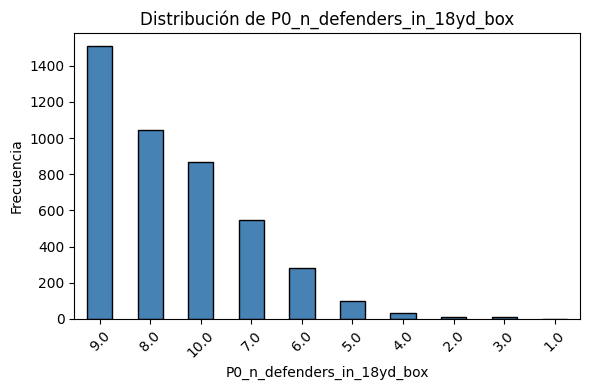

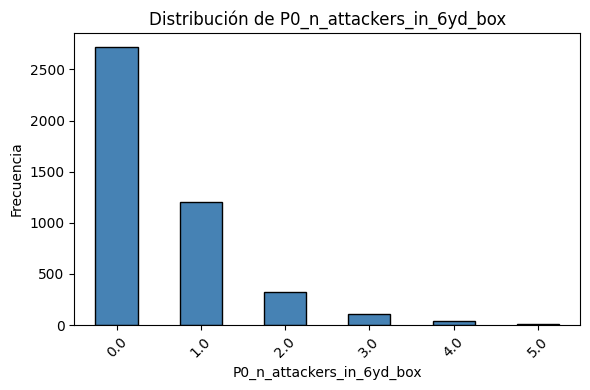

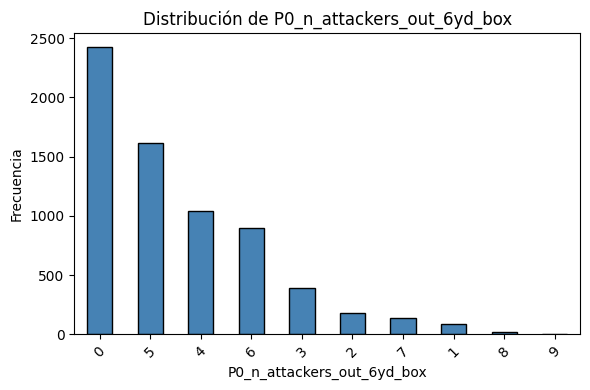

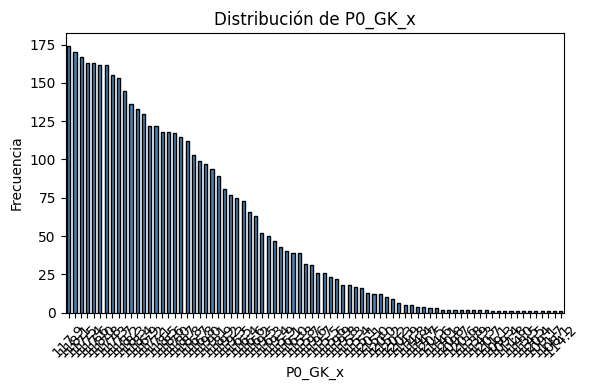

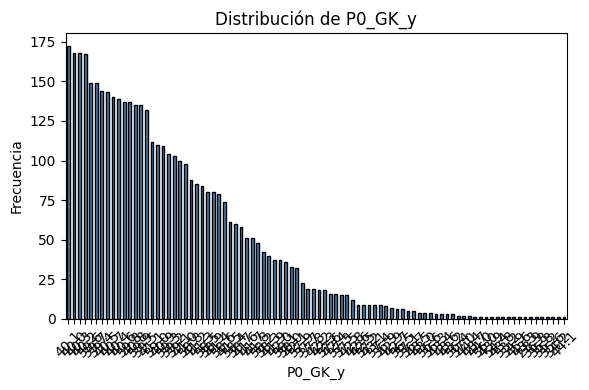

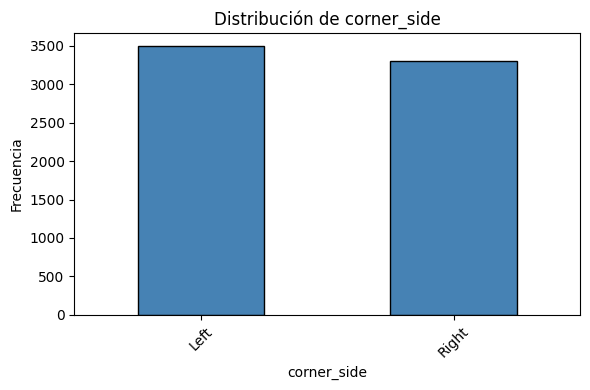

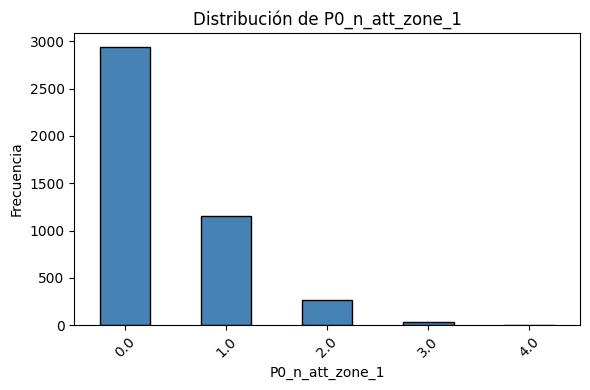

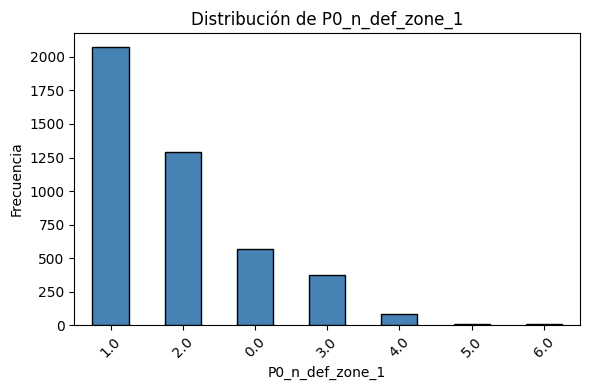

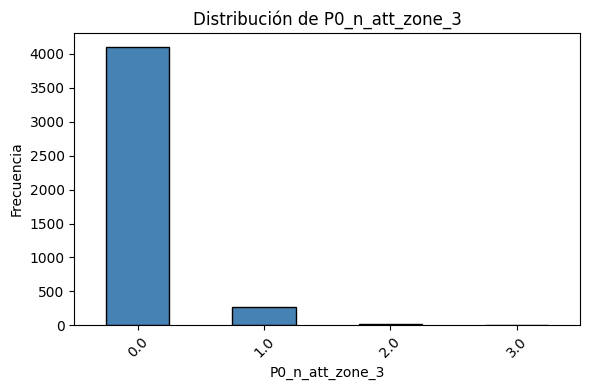

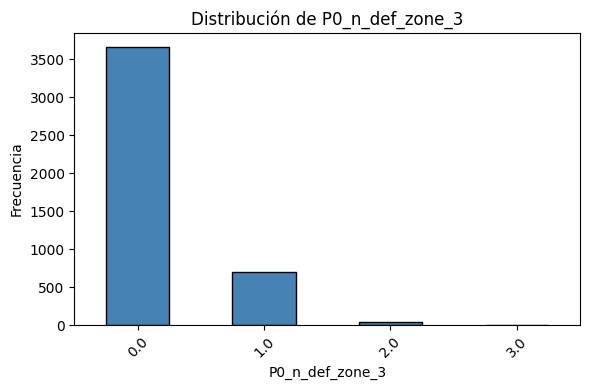

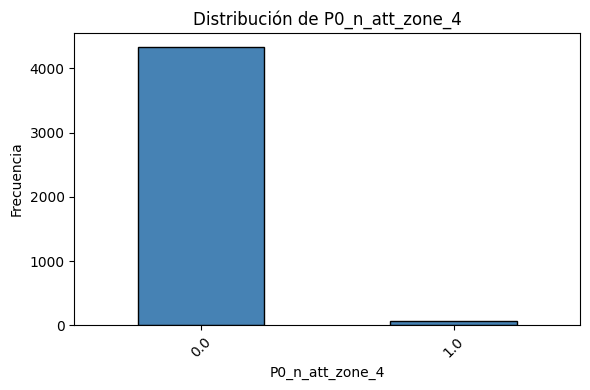

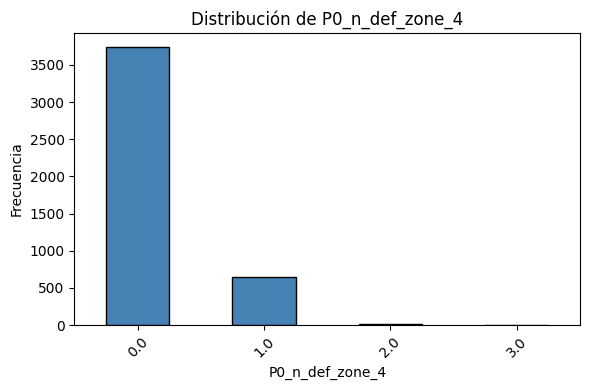

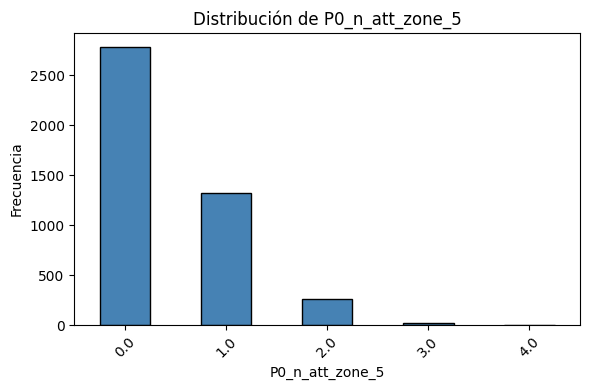

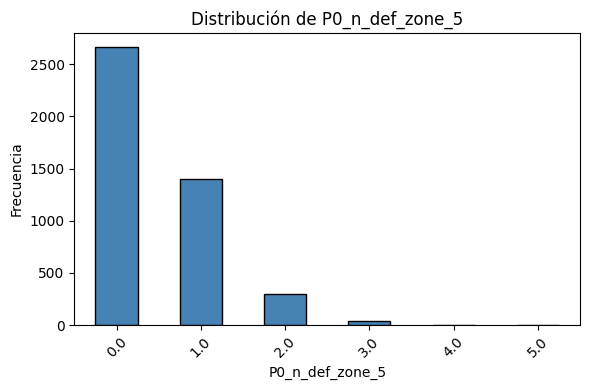

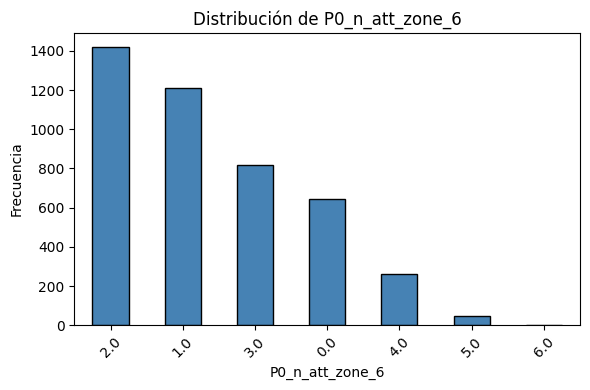

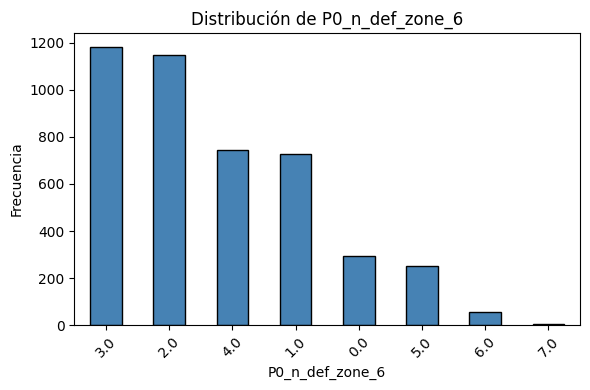

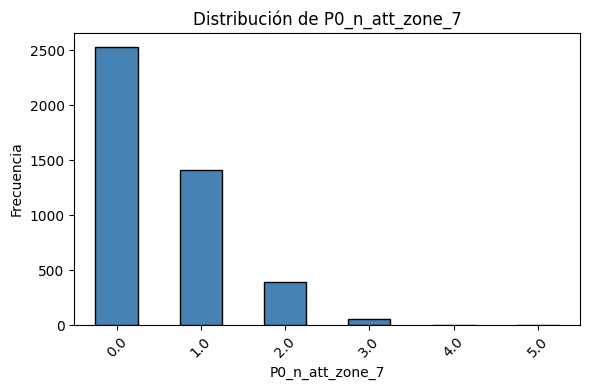

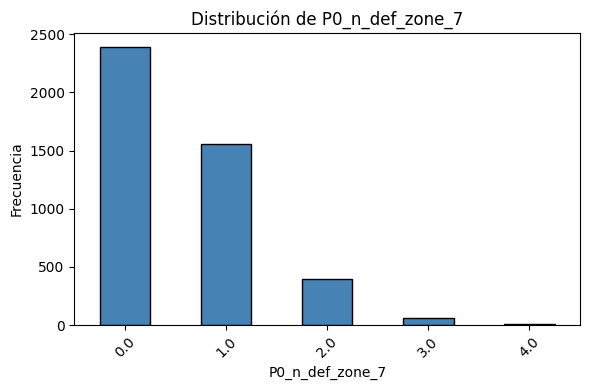

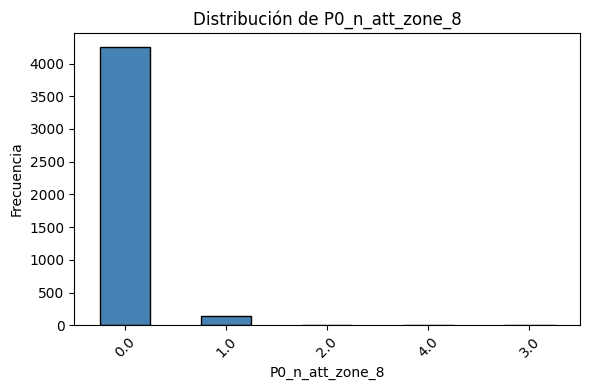

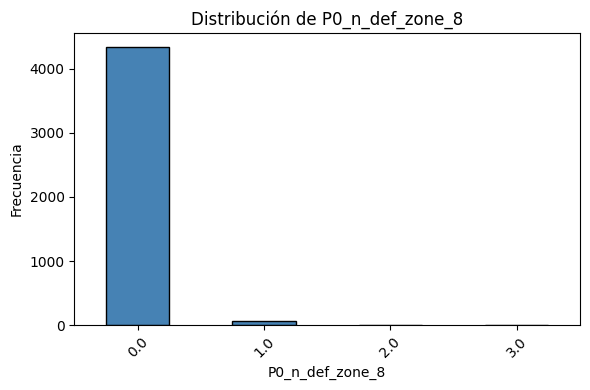

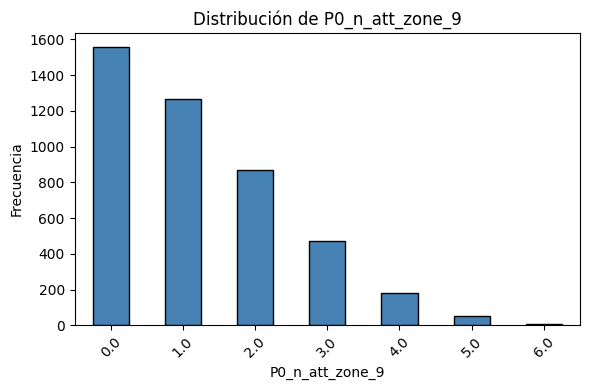

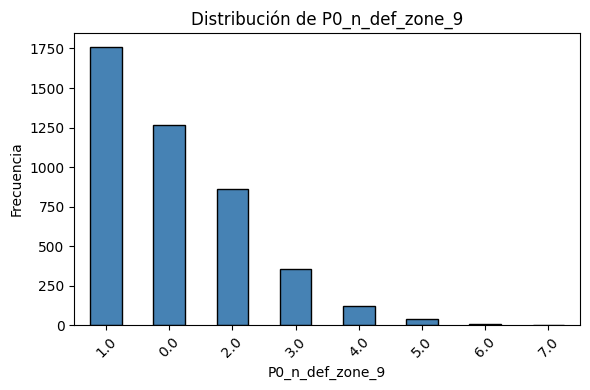

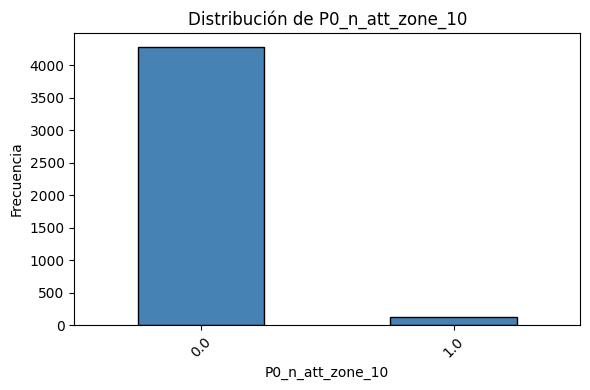

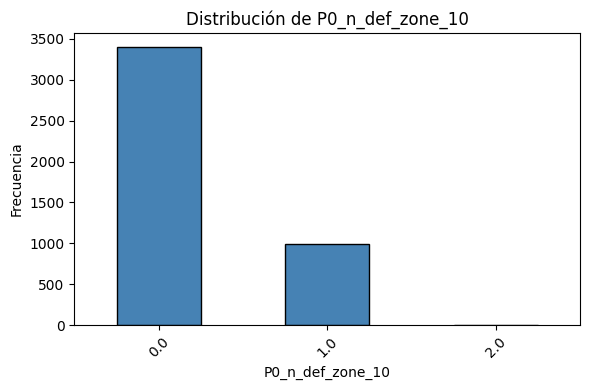

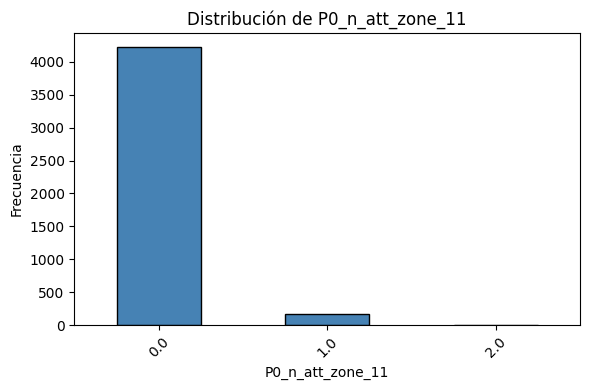

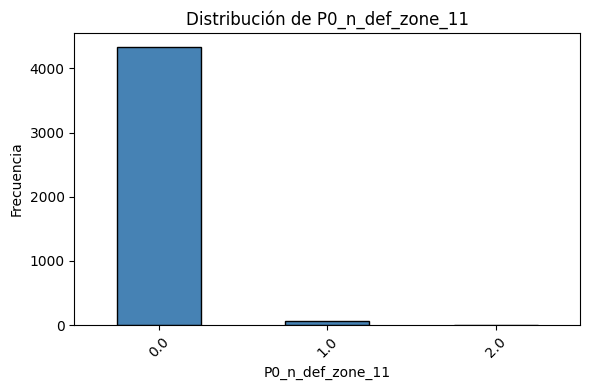

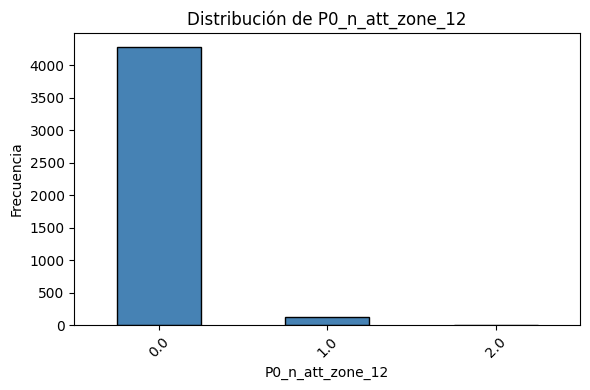

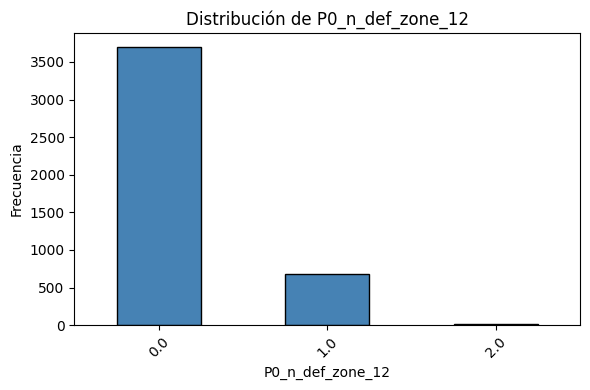

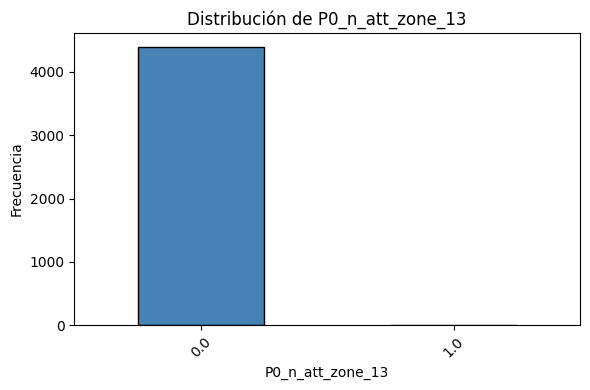

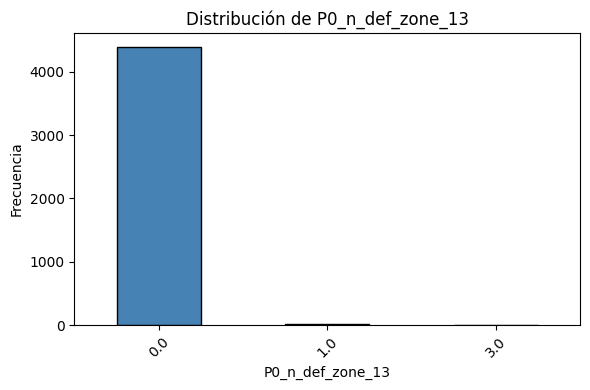

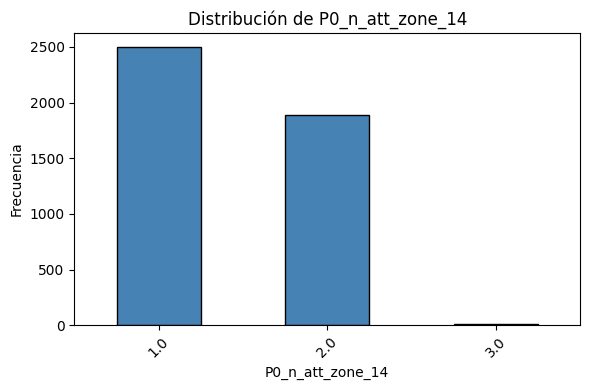

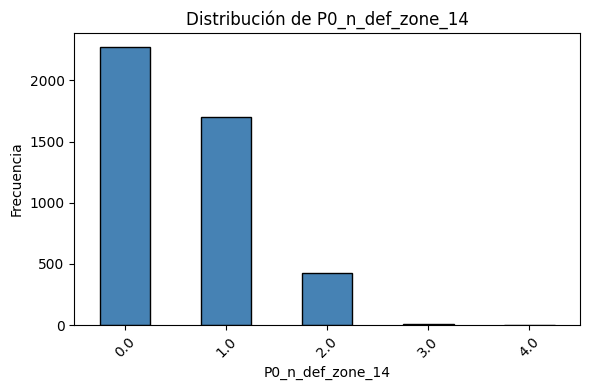

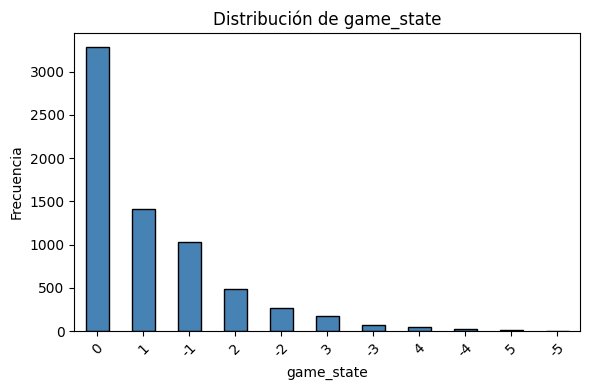

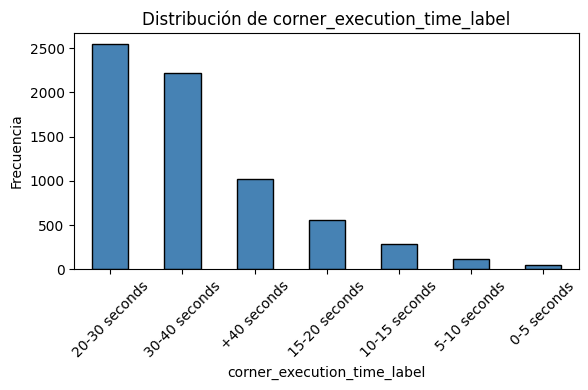

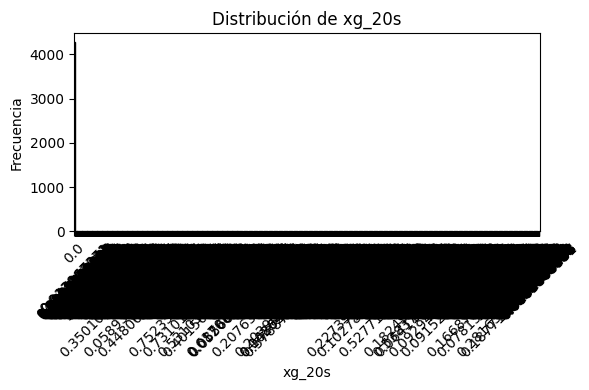

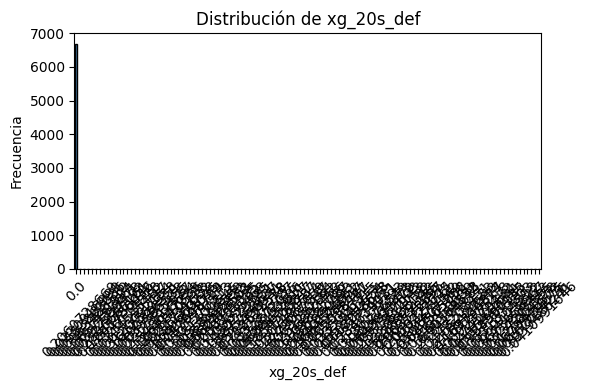

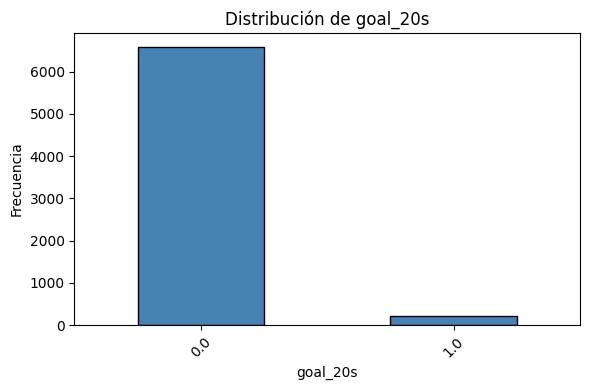

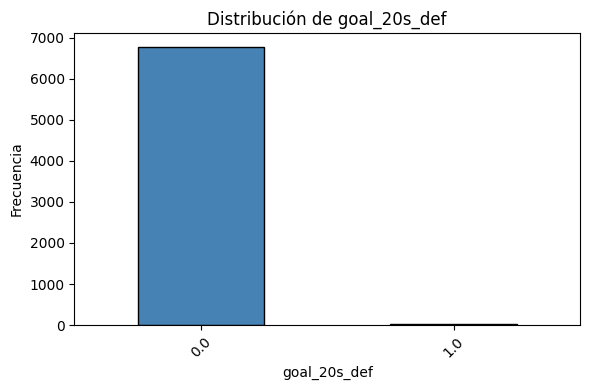

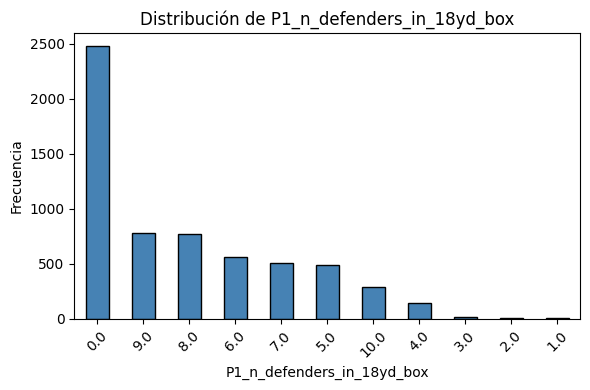

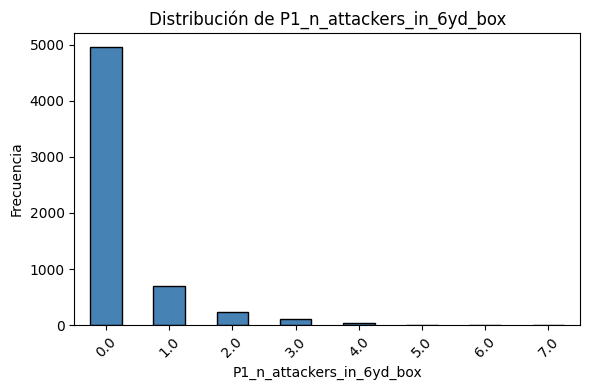

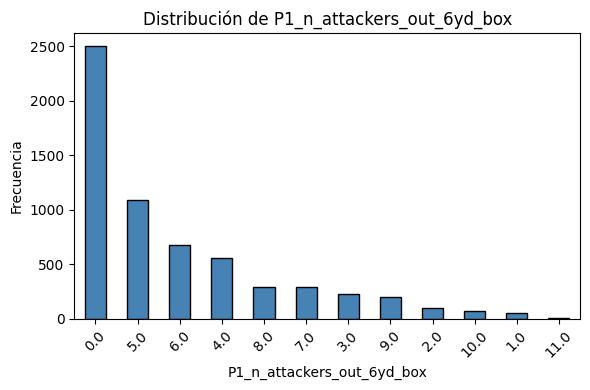

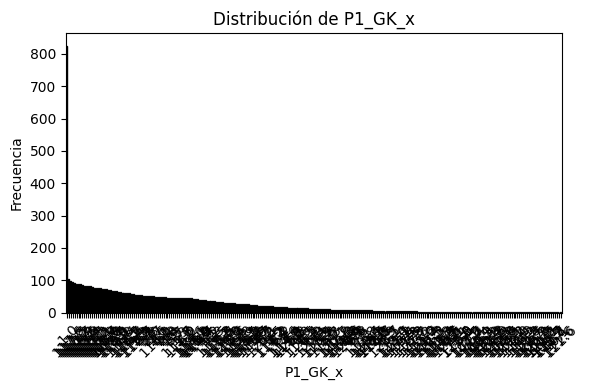

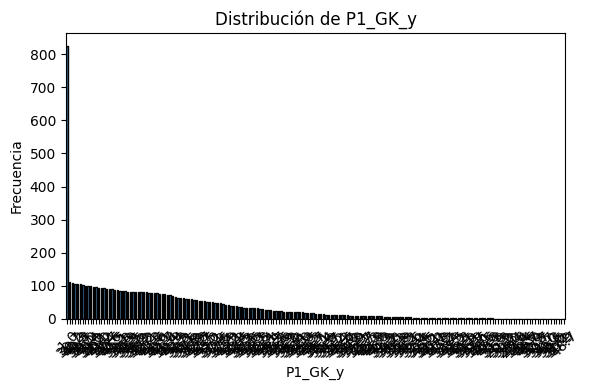

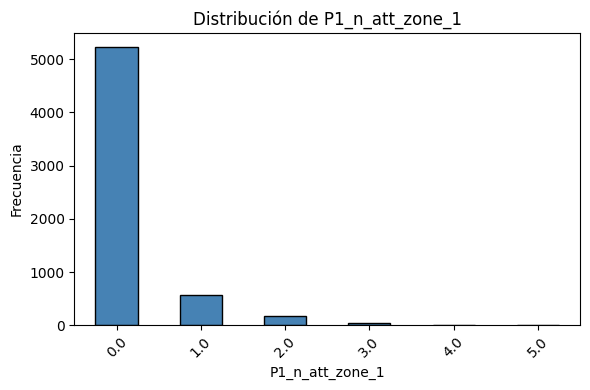

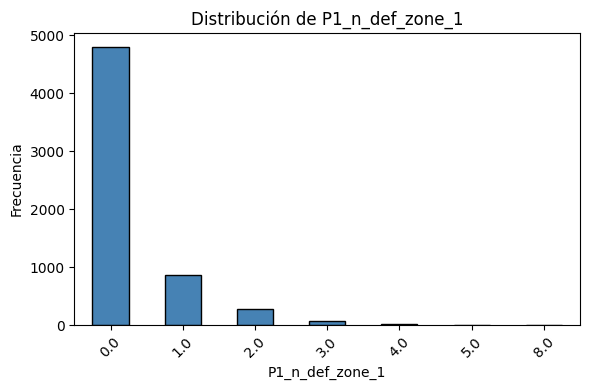

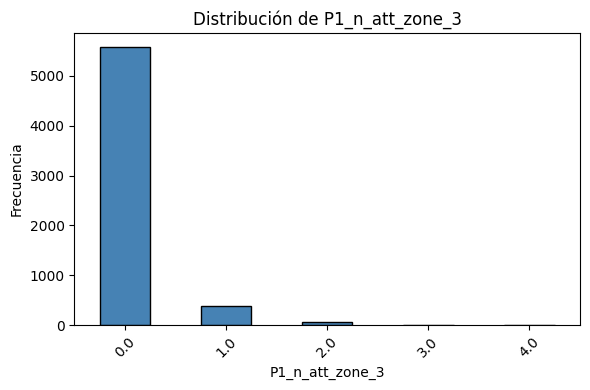

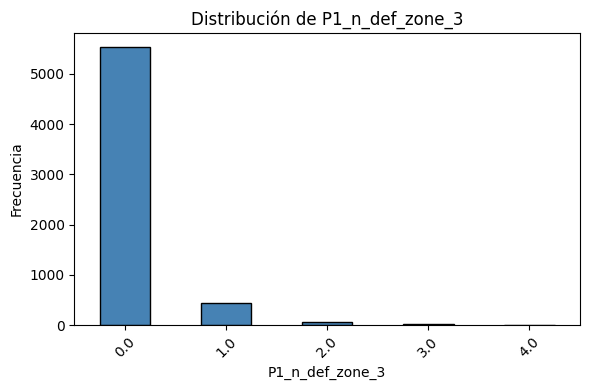

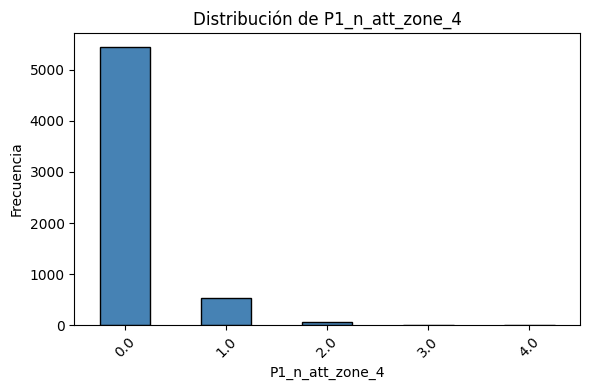

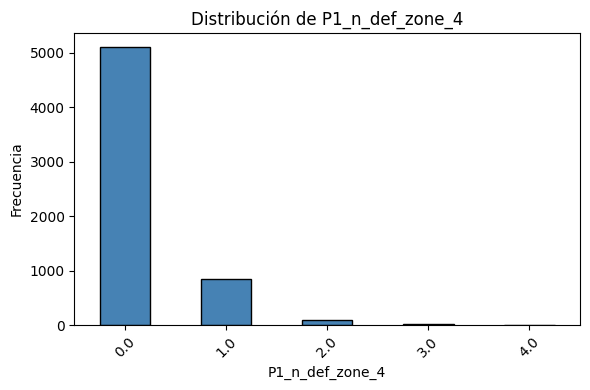

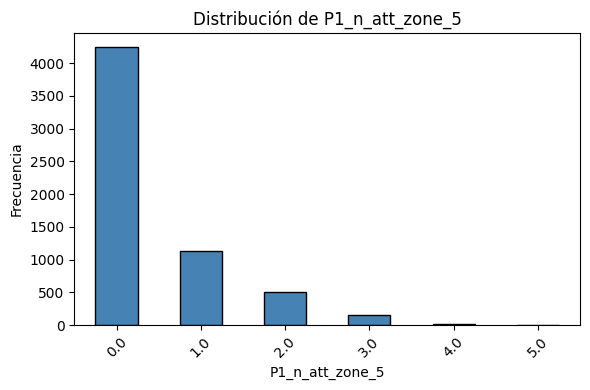

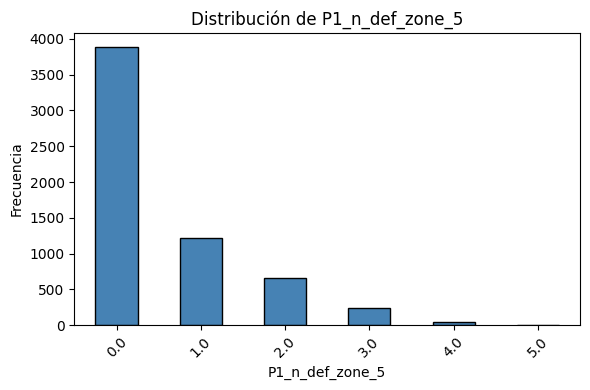

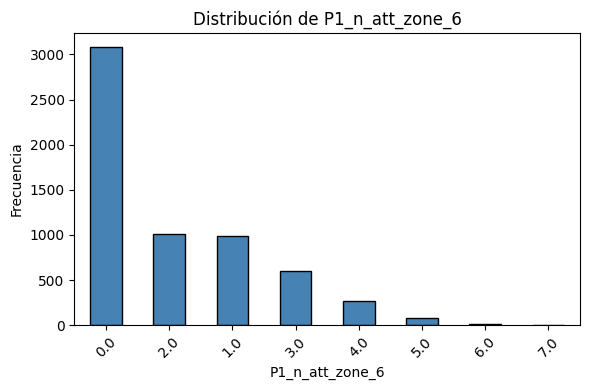

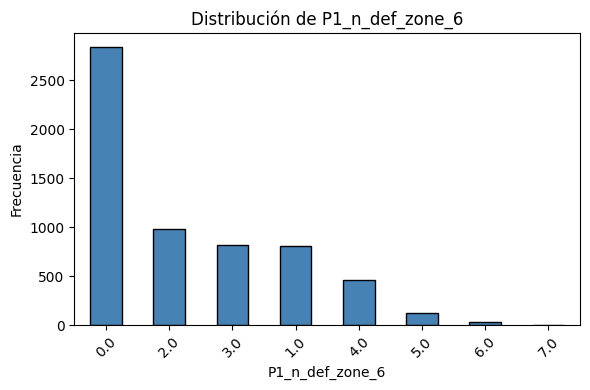

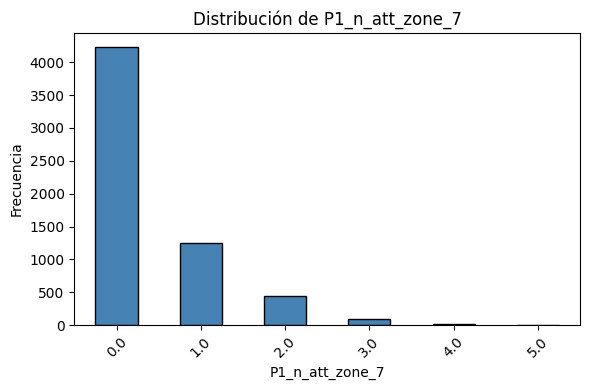

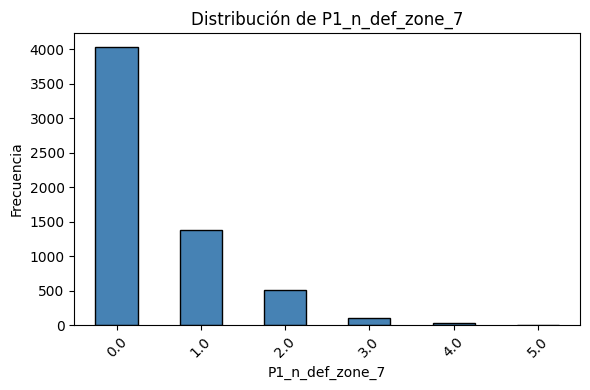

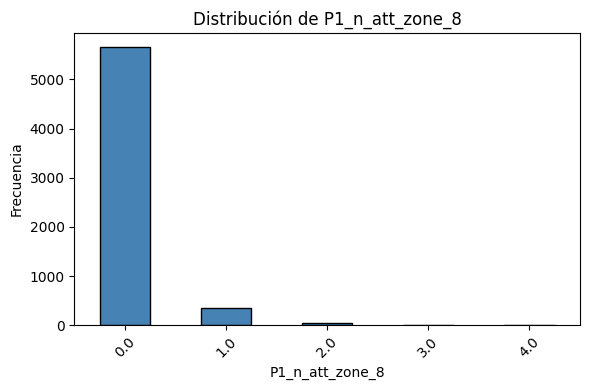

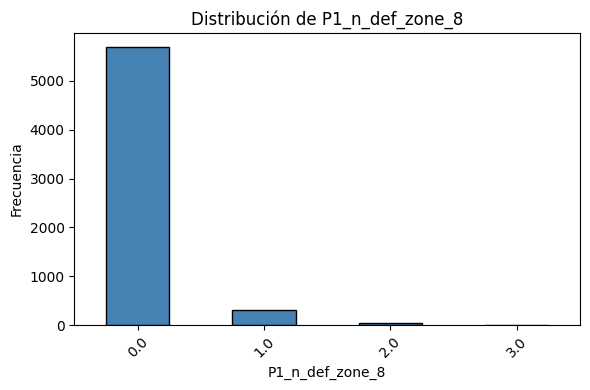

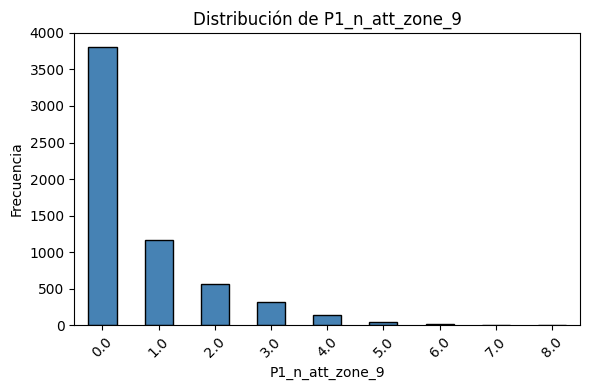

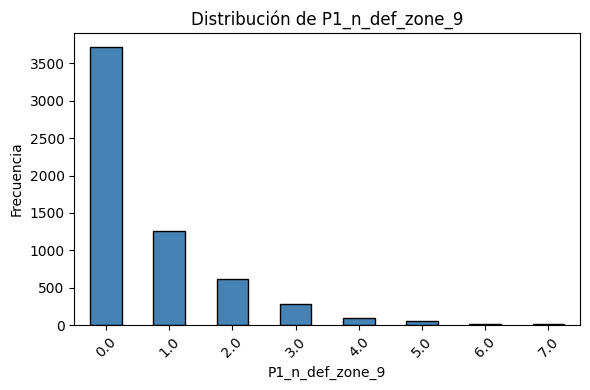

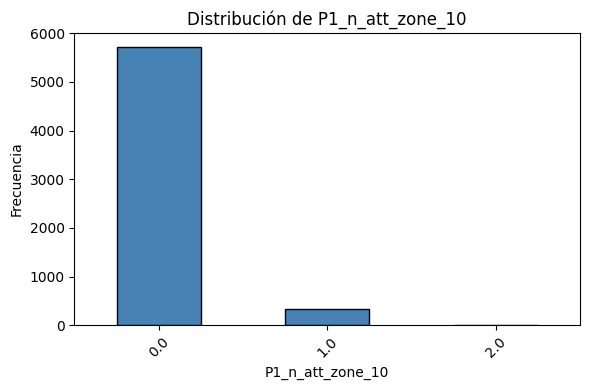

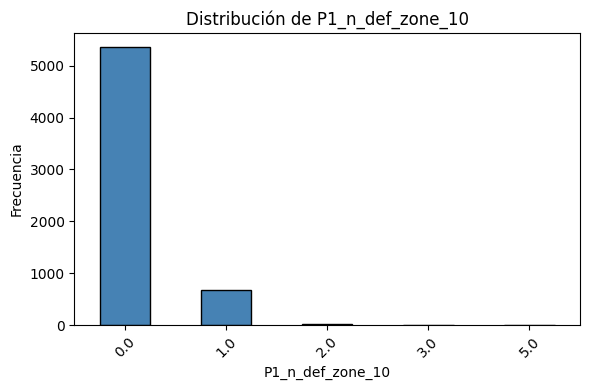

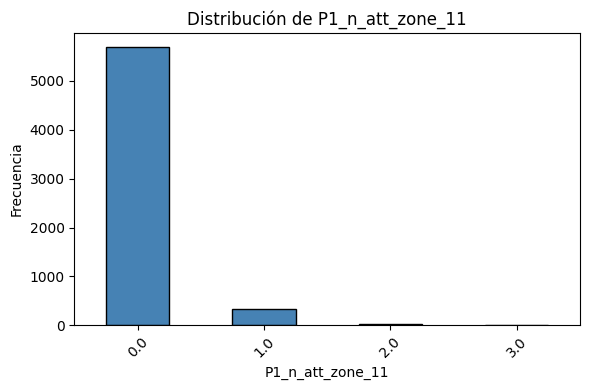

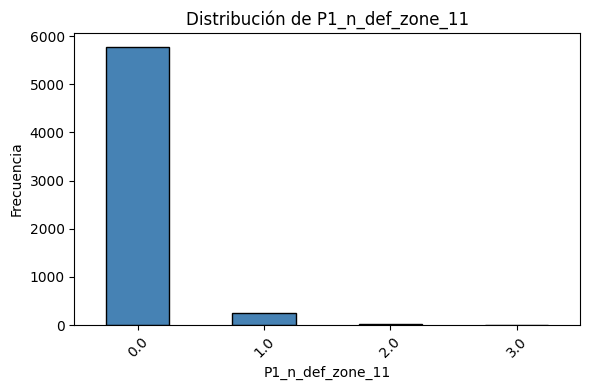

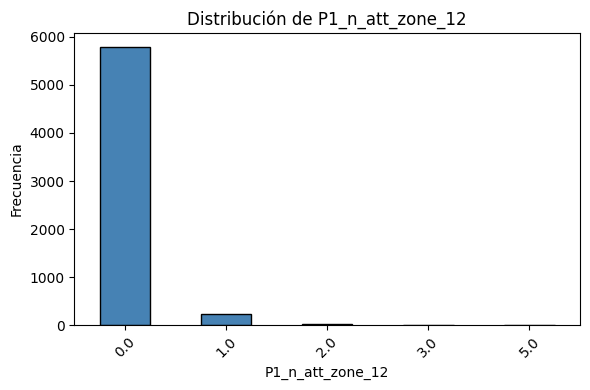

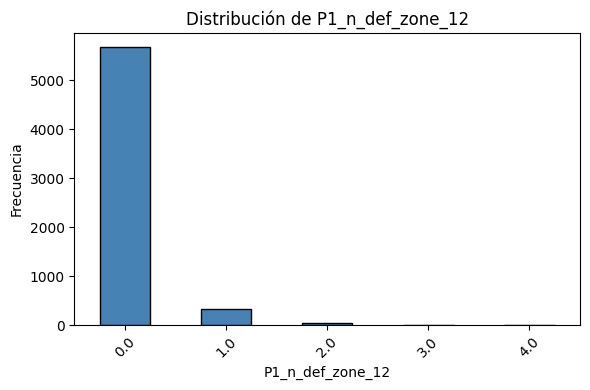

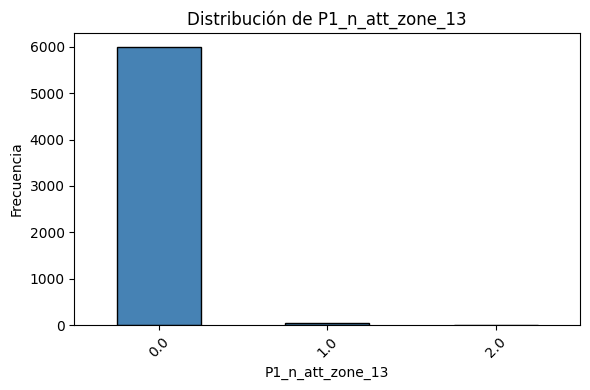

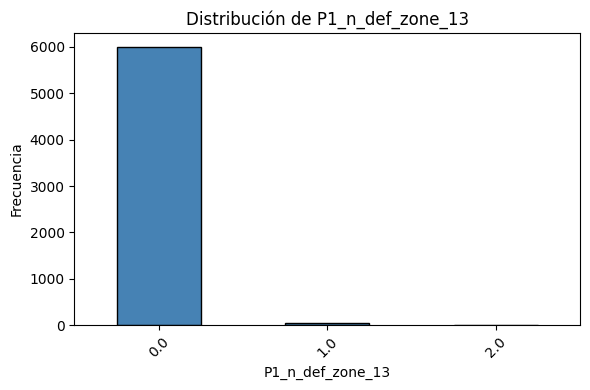

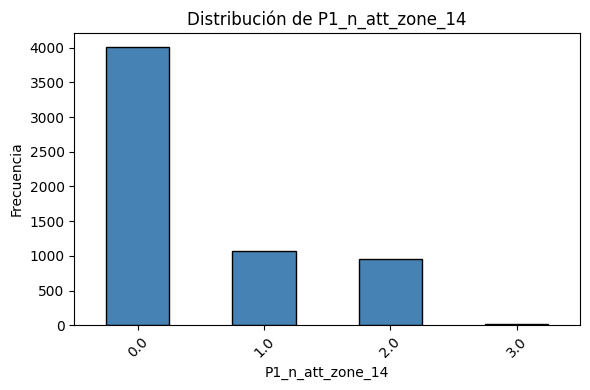

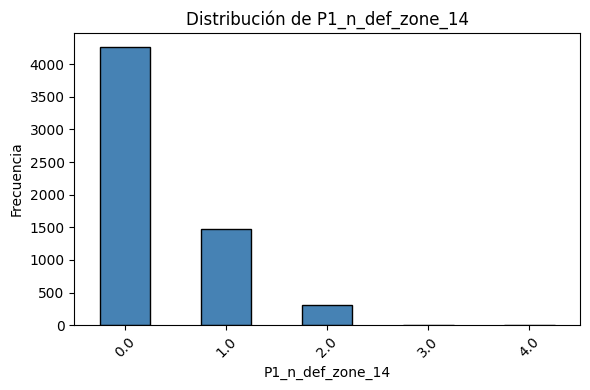

In [7]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()